# 6. Linear Regression with PyTorch
## 1. About Linear Regression


### 1.1 Simple Linear Regression Basics
- Allows us to understand **relationship** between two **continuous variables**
- Example
    - x: independent variable
        - weight
    - y: dependent variable
        - height
- $y = \alpha x + \beta$

### 1.2 Example of simple linear regression

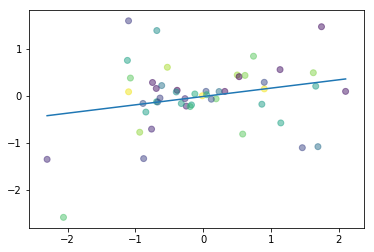

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.rand(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

### 1.3 Aim of Linear Regression
- Minimize the distance between the points and the line ($y = \alpha x + \beta$)
- Adjusting
    - Coefficient: $\alpha$
    - Bias/intercept: $\beta$

## 2. Building a Linear Regression Model with PyTorch

### 2.1 Example
- Coefficient: $\alpha = 2$
- Bias/intercept: $\beta = 1$
- Equation: $y = 2x + 1$

### 2.2 Building a Toy Dataset

In [2]:
x_values = [i for i in range(11)]

In [3]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [5]:
# IMPORTANT: 2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

$y = 2x + 1$

In [6]:
y_values = [2*i + 1 for i in x_values]

In [7]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [8]:
# In case you're weak in list iterators...
y_values = []
for i in x_values:
    result = 2*i + 1
    y_values.append(result) 

In [9]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [10]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [11]:
# IMPORTANT: 2D required
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

### 2.3 Building Model

**Critical Imports**

In [13]:
import torch
import torch.nn as nn
from torch.autograd import Variable

**Create Model**
1. Linear model
    - True Equation: $y = 2x + 1$
2. Forward
    - Example
        - Input $x = 1 $
        - Output $\hat y = ?$

In [14]:
# Create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

**Instantiate Model Class**
- input: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
- desired output: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [15]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

**Instantiate Loss Class**
- MSE Loss: Mean Squared Error
- $MSE = \frac{1}{n} \sum_{i=1}^n(\hat y_i - y_i)$
    - $\hat y$: prediction
    - $y$: true value

In [17]:
criterion = nn.MSELoss()

**Instantiate Optimizer Class**
- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_\theta $
        - $\theta$: parameters (our variables)
        - $\eta$: learning rate (how fast we want to learn)
        - $\nabla_\theta$: parameters' gradients
- Even simplier equation
    - `parameters = parameters - learning_rate * parameters_gradients`
        - parameters: $\alpha$ and $\beta$ in $ y = \alpha x + \beta$
        - desired parameters: $\alpha = 2$ and $\beta = 1$ in $ y = 2x + 1$

In [18]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

**Train Model**
- 1 epoch: going through the whole x_train data once
    - 100 epochs: 
        - 100x mapping `x_train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`
        
- Process 
    1. Convert inputs/labels to tensors with gradients
    2. Clear gradient buffets
    3. Get output given inputs 
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPEAT

In [19]:
epochs = 100

In [24]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.data[0]))

epoch 1, loss 5.488742351531982
epoch 2, loss 0.9309054017066956
epoch 3, loss 0.5537410974502563
epoch 4, loss 0.5176412463188171
epoch 5, loss 0.5094209313392639
epoch 6, loss 0.503533124923706
epoch 7, loss 0.4978938400745392
epoch 8, loss 0.49233272671699524
epoch 9, loss 0.4868347942829132
epoch 10, loss 0.4813983738422394
epoch 11, loss 0.4760226905345917
epoch 12, loss 0.4707070291042328
epoch 13, loss 0.4654509425163269
epoch 14, loss 0.46025320887565613
epoch 15, loss 0.45511385798454285
epoch 16, loss 0.45003125071525574
epoch 17, loss 0.4450059235095978
epoch 18, loss 0.4400363862514496
epoch 19, loss 0.43512293696403503
epoch 20, loss 0.43026426434516907
epoch 21, loss 0.4254593551158905
epoch 22, loss 0.4207083582878113
epoch 23, loss 0.4160100221633911
epoch 24, loss 0.41136452555656433
epoch 25, loss 0.406770795583725
epoch 26, loss 0.4022289216518402
epoch 27, loss 0.3977372348308563
epoch 28, loss 0.3932957351207733
epoch 29, loss 0.38890397548675537
epoch 30, loss 0.3

**Compare Data**

In [26]:
# Purely inference
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[  0.22133885],
       [  2.33347297],
       [  4.44560719],
       [  6.55774164],
       [  8.6698761 ],
       [ 10.78201008],
       [ 12.89414501],
       [ 15.00627899],
       [ 17.11841202],
       [ 19.23054695],
       [ 21.34267998]], dtype=float32)

In [27]:
# y = 2x + 1 
y_train

array([[  1.],
       [  3.],
       [  5.],
       [  7.],
       [  9.],
       [ 11.],
       [ 13.],
       [ 15.],
       [ 17.],
       [ 19.],
       [ 21.]], dtype=float32)

**Plot Graph**

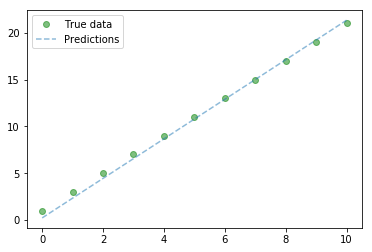

In [29]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

**Save Model**

In [22]:
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_model.pkl')

**Load Model**

In [23]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

## 3. Building a Linear Regression Model with PyTorch (GPU)



**CPU Summary**

In [31]:
import torch
import torch.nn as nn

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()

GPU: 2 things must be on GPU
- `model`
- `tensors with gradients`

In [35]:
import torch
import torch.nn as nn
import numpy as np

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)


#######################
#  USE GPU FOR MODEL  #
#######################

if torch.cuda.is_available():
    model.cuda()

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    
    #######################
    #  USE GPU FOR MODEL  #
    #######################
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))


    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # Logging
    print('epoch {}, loss {}'.format(epoch, loss.data[0]))

epoch 1, loss 311.9888000488281
epoch 2, loss 25.992170333862305
epoch 3, loss 2.658254861831665
epoch 4, loss 0.7489710450172424
epoch 5, loss 0.5872949957847595
epoch 6, loss 0.5682318210601807
epoch 7, loss 0.5608657598495483
epoch 8, loss 0.5545195937156677
epoch 9, loss 0.5483205914497375
epoch 10, loss 0.5421971678733826
epoch 11, loss 0.5361425280570984
epoch 12, loss 0.5301553606987
epoch 13, loss 0.5242351293563843
epoch 14, loss 0.5183811783790588
epoch 15, loss 0.5125927329063416
epoch 16, loss 0.506868302822113
epoch 17, loss 0.5012083649635315
epoch 18, loss 0.4956115484237671
epoch 19, loss 0.49007731676101685
epoch 20, loss 0.4846043288707733
epoch 21, loss 0.4791930317878723
epoch 22, loss 0.4738418459892273
epoch 23, loss 0.4685504138469696
epoch 24, loss 0.4633180797100067
epoch 25, loss 0.4581444561481476
epoch 26, loss 0.4530283212661743
epoch 27, loss 0.447969526052475
epoch 28, loss 0.44296738505363464
epoch 29, loss 0.4380207359790802
epoch 30, loss 0.43312931060

# Summary

- Simple **linear regression basics**
    - $y = Ax + B$
    - $y = 2x + 1$
- **Example** of simple linear regression
- **Aim** of linear regression
    - Minimizing distance between the points and the line
        - Calculate "distance" through `MSE`
        - Calculate `gradients`
        - Update parameters with `parameters = parameters - learning_rate * gradients`
        - Slowly update parameters $A$ and $B$ model the linear relationship between $y$ and $x$ of the form $y = 2x + 1$
- Built a linear regression **model** in **CPU and GPU**
    - Step 1: Create Model Class
    - Step 2: Instantiate Model Class
    - Step 3: Instantiate Loss Class
    - Step 4: Instantiate Optimizer Class
    - Step 5: Train Model
- Important things to be on **GPU**
    - `model`
    - `tensors with gradients`
- How to bring to **GPU**?
    - `model_name.cuda()`
    - `variable_name.cuda()`